In [2]:
import gym
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt

from mlp import *
from feedback_env import *
from learning import *

In [30]:
# Setup configs for reward and policy learning

reward_cfg = {
    'n_sample': 300,
    'n_epoch': 40,
    'lr': 0.001,
    'verbose': False,
    'eval_freq': 100,
    'batch_size': 32,
    'split': 0.8,
    'log': False,
    'action_dim': 2,
    'layers': [25, 25, 25]
}

policy_cfg = {
    'timesteps': 25000,
    'verbose': False,
    'algo': 'ppo', # not used atm
    'log': False,
    'action_dim': 2
}

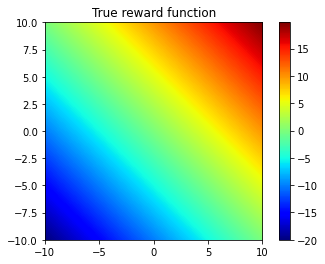

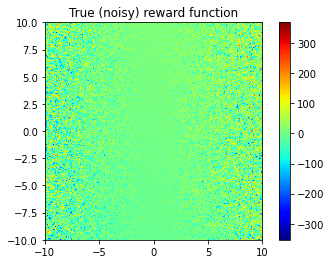

In [31]:
## Feedback loop

iterations = 1

# Create comparison function
v = 10
reward_fn_true = lambda x : x[0] + x[1]
reward_fn_true_noisy = lambda x: x[1] + x[0]*np.random.normal(1,v)
comparison_fn = lambda x, y: reward_fn_true_noisy(x) >= reward_fn_true_noisy(y)

# Initialize random sampler
sample = lambda n: (None, [np.random.uniform(-10, 10, size=(2,)) for _ in range(n)])

# Plot true reward function
visualize_fn(reward_fn_true, title="True reward function", x_range=[-10,10], y_range=[-10,10], x_step=0.1, y_step=0.1)
visualize_fn(reward_fn_true_noisy, title="True (noisy) reward function", x_range=[-10,10], y_range=[-10,10], x_step=0.1, y_step=0.1)

In [32]:
comparisons_data = None
samples = {}
reward_fns = {}

for i in range(iterations):
    print("Iteration", i)
    # Learn reward function from samples and feedback from comparison function
    reward_fn, comparisons_data = learn_reward(sample, comparison_fn, reward_cfg=reward_cfg, prev_comparisons=comparisons_data)
    
    # Train policy on reward function and return sampler
    # sample = train_policy(reward_fn, policy_cfg=policy_cfg)

    # Store sampler and reward function
    # samples[i] = sample
    reward_fns[i] = reward_fn


Iteration 0


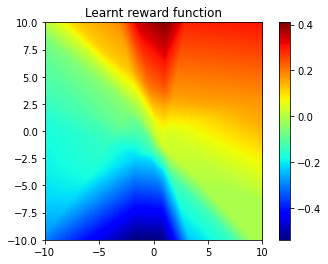

In [33]:
visualize_fn(reward_fns[0], title="Learnt reward function", x_range=[-10,10], y_range=[-10,10], x_step=0.1, y_step=0.1)

In [34]:
def find_optimal(fn, ub):
    argmax = None
    max_val = None
    for x in np.arange(0,ub,0.1):
        for y in np.arange(0,ub,0.1):
            val = fn([x,y])
            if max_val is None or val >= max_val:
                argmax = [x,y]
                max_val = val
    return argmax

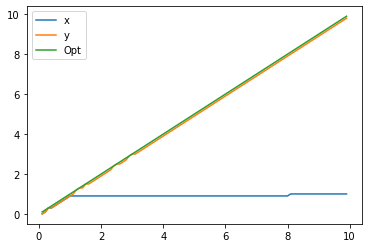

In [35]:
plt.figure()
ubs = list(np.arange(0.1,10,0.1))
vals = [find_optimal(reward_fns[0], ub) for ub in ubs]
plt.plot(ubs, [v[0] for v in vals], label="x")
plt.plot(ubs, [v[1] for v in vals], label="y")
plt.plot(ubs, ubs, label="Opt")
plt.legend()

In [23]:
vals

[[0.0, 0.0],
 [0.1, 0.1],
 [0.30000000000000004, 0.30000000000000004],
 [0.30000000000000004, 0.30000000000000004],
 [0.4, 0.4],
 [0.5, 0.5],
 [0.6000000000000001, 0.6000000000000001],
 [0.7000000000000001, 0.7000000000000001],
 [0.8, 0.8],
 [0.9, 0.9],
 [1.0, 1.0],
 [1.2000000000000002, 1.2000000000000002],
 [1.3, 1.3],
 [1.3, 1.3],
 [1.1, 1.5],
 [1.1, 1.5],
 [1.1, 1.6],
 [1.1, 1.7000000000000002],
 [1.1, 1.8],
 [1.1, 1.9000000000000001],
 [1.1, 2.0],
 [1.0, 2.1],
 [1.0, 2.2],
 [1.0, 2.4000000000000004],
 [1.0, 2.5],
 [1.0, 2.5],
 [1.0, 2.6],
 [1.0, 2.7],
 [0.9, 2.9000000000000004],
 [0.9, 3.0],
 [0.9, 3.0],
 [0.9, 3.1],
 [0.9, 3.2],
 [0.9, 3.3000000000000003],
 [0.9, 3.4000000000000004],
 [0.9, 3.5],
 [0.9, 3.6],
 [0.9, 3.7],
 [0.9, 3.8000000000000003],
 [0.8, 3.9000000000000004],
 [0.8, 4.0],
 [0.8, 4.1000000000000005],
 [0.8, 4.2],
 [0.8, 4.3],
 [0.8, 4.4],
 [0.8, 4.5],
 [0.7000000000000001, 4.6000000000000005],
 [0.7000000000000001, 4.7],
 [0.7000000000000001, 4.800000000000001],


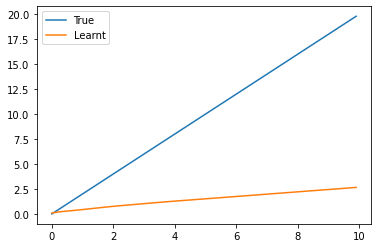

In [10]:
plt.figure()
xs = list(np.arange(0,10,0.1))
plt.plot(xs, [reward_fn_true([x,x]) for x in xs], label="True")
plt.plot(xs, [reward_fns[0]([x,x]) for x in xs], label="Learnt")
plt.legend()

In [ ]:
arg_max, max_val = None, None
for x in np.arange(-10,10,0.1):
    for y in np.arange(-10,10,0.1):
        val = reward_fns[0]([x,y])
        if max_val is None or val > max_val:
            arg_max = [x, y]
            max_val = val
print(arg_max, max_val)
print(reward_fns[0]([5,0]))

[5.999999999999943, -0.4000000000000341] 3.9864764
3.773511
